In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from sys import stdout
import matplotlib.pyplot as plt

**First let's load the dataset cleaned in "Scraping and cleaning" notebook**

In [2]:
df_app = pd.read_csv('data/final_dataset.csv', index_col=[0])
df_app.head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker",2241579,50000000.0,4.68,4.7,8.8,Free,Art & Design,...,False,"Nov 27, 2017",1.587087e+09,2.57.2,"[{'userName': 'Alexis James', 'userImage': 'ht...",https://lh3.googleusercontent.com/homswqZDKEXx...,10535421.3,19725895.2,2.444906e+08,496.0
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,642389,10000000.0,4.45,4.4,9.0,Free,Art & Design,...,True,"Feb 27, 2014",1.585644e+09,6.4.1,[],https://lh3.googleusercontent.com/QcfhlXm32JDn...,2826511.6,5781501.0,4.735863e+07,1669.0
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,399327,10000000.0,4.63,0.0,0.0,Free,Art & Design,...,True,"May 24, 2010",1.514876e+09,1.8.3,[],https://lh3.googleusercontent.com/7aIuxwpjZ9_S...,0.0,0.0,4.814888e+07,1480.0
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,319841,10000000.0,4.28,1.5,3.2,Free,Art & Design,...,True,"Apr 2, 2012",1.581218e+09,2.4.6,[],https://lh3.googleusercontent.com/v1LHbiVKdHFs...,479761.5,1023491.2,4.416892e+07,2940.0
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps",216161,10000000.0,4.52,1.6,3.4,Free,Art & Design,...,True,"Dec 12, 2017",1.586780e+09,2.2.24,[],https://lh3.googleusercontent.com/1-d8bEwvbj4c...,345857.6,734947.4,4.617705e+07,2045.0
5,/application/medibang_paint_make_art_/com.medi...,6.0,MediBang Paint - Make Art !,194262,10000000.0,4.10,1.2,2.5,Free,Art & Design,...,True,"Jun 16, 2015",1.583984e+09,18.4,[],https://lh3.googleusercontent.com/gJiINYcgwxuy...,233114.4,485655.0,4.179647e+07,4029.0
6,/application/u_launcher_3d_new_launcher_2019_3...,7.0,"U Launcher 3D: New Launcher 2019, 3d themes",130195,5000000.0,4.50,1.1,2.0,Free,Art & Design,...,True,"Apr 11, 2017",1.586074e+09,2.8.4,[],https://lh3.googleusercontent.com/bgXCQ7c3ahr0...,143214.5,260390.0,2.308588e+07,6198.0
7,/application/papercolor/com.eyewind.paperone,8.0,PaperColor,111058,10000000.0,4.23,1.9,4.2,Free,Art & Design,...,False,"Jun 17, 2016",1.544193e+09,2.3.6,[],https://lh3.googleusercontent.com/zk1SVbWvnYrH...,211010.2,466443.6,4.276978e+07,3598.0
8,/application/sand_draw_sketch_drawing_pad_crea...,9.0,Sand Draw Sketch Drawing Pad: Creative Doodle Art,99055,5000000.0,4.37,0.9,1.9,Free,Art & Design,...,True,"Mar 21, 2013",1.557643e+09,3.4.3,[],https://lh3.googleusercontent.com/FEtDcu77tw3X...,89149.5,188204.5,2.228287e+07,6787.0
9,/application/how_to_draw_graffitis/com.sweefit...,10.0,How to Draw Graffitis,94175,5000000.0,4.33,0.2,0.4,Free,Art & Design,...,True,"Feb 21, 2015",1.570780e+09,7.1.2,[],https://lh3.googleusercontent.com/Ax5kgE7e8TLP...,18835.0,37670.0,2.205778e+07,6978.0


**Now let's see the repartion of the free and paid app on the Google Play Store**

In [3]:
df_app["Price"].value_counts().head(10)

Free     22627
$4.99       22
$0.99       19
$2.99       16
$1.99       14
$3.99        8
$6.99        5
$5.99        4
$2.49        4
$9.99        4
Name: Price, dtype: int64

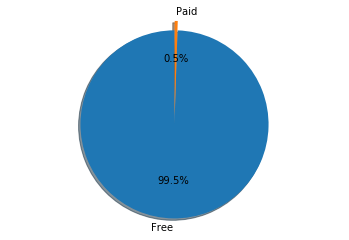

In [4]:
labels = 'Free', 'Paid'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[df_app["Price"]=="Free"])[0], np.shape(df_app[df_app["Price"]!="Free"])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Now let's see this distribution over all the categories**

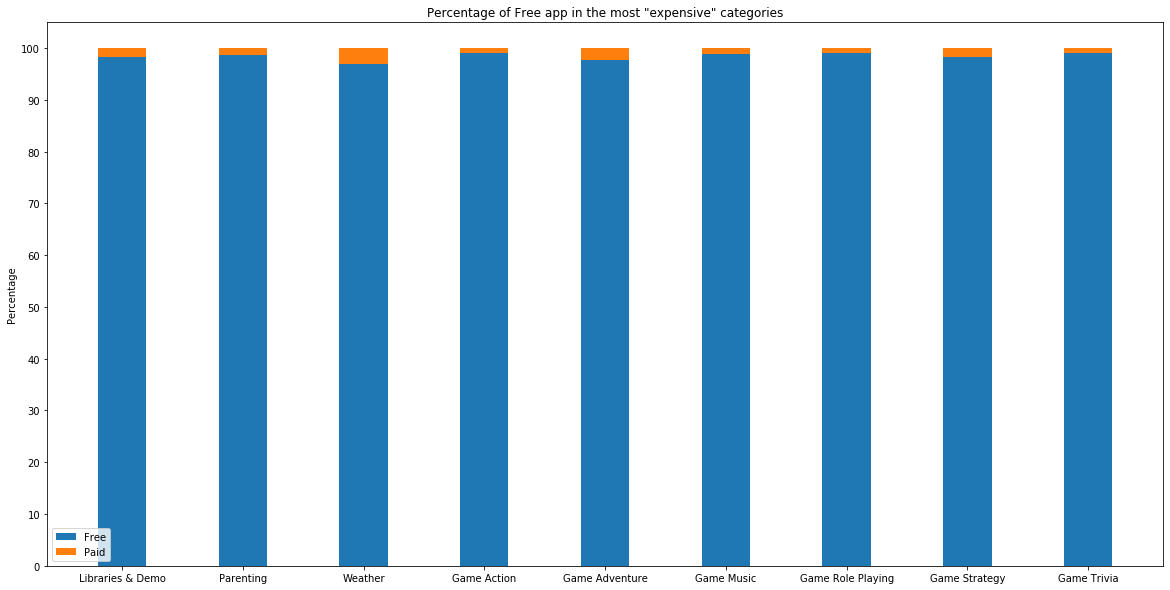

In [5]:
free = []
paid = []
label =[]
for category in df_app.Category.unique():
    free_cat = np.shape(df_app[(df_app["Price"]=="Free") & (df_app["Category"]== category)])[0]
    paid_cat = np.shape(df_app[(df_app["Price"]!="Free") & (df_app["Category"]== category)])[0]
    if((paid_cat/(free_cat+paid_cat))*100 >=1):
        label.append(category)
        free.append(free_cat/(free_cat+paid_cat)*100)
        paid.append((paid_cat/(free_cat+paid_cat))*100)
ind = np.arange(len(free))    
width = 0.4      
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, free, width,)
p2 = plt.bar(ind, paid, width,
             bottom=free)

plt.ylabel("Percentage")
plt.title('Percentage of Free app in the most "expensive" categories')
plt.xticks(ind, label)
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))

plt.show()

In [7]:
df_app["Nb_Rating"].describe()

count    2.274600e+04
mean     2.003982e+05
std      1.634216e+06
min      1.000000e+02
25%      8.091000e+03
50%      3.220650e+04
75%      9.772125e+04
max      1.068849e+08
Name: Nb_Rating, dtype: float64

In [8]:
df_app["Installs"].describe()

count    2.274600e+04
mean     1.144295e+07
std      1.242483e+08
min      1.000000e+00
25%      1.000000e+06
50%      1.000000e+06
75%      5.000000e+06
max      5.000000e+09
Name: Installs, dtype: float64

In [9]:
df_app[df_app["Installs"]== df_app["Installs"].max()]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,size,androidVersion,developer,developerId,containsAds,released,updated,version,comments,icon
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,27M,4.0.3,WhatsApp Inc.,WhatsApp+Inc.,False,"Oct 18, 2010",1.586970e+09,2.20.123,NaN,https://lh3.googleusercontent.com/bYtqbOcTYOlg...
2939,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Feb 7, 2012",1.586974e+09,Varies with device,NaN,https://lh3.googleusercontent.com/KwUBNPbMTk9j...
2945,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Sep 21, 2010",1.587253e+09,Varies with device,NaN,https://lh3.googleusercontent.com/qTG9HMCp-s_a...
9141,/application/google_play_music/com.google.andr...,3.0,Google Play Music,4382860,5.000000e+09,4.10,1.1,1.9,Free,Music & Audio,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"May 5, 2011",1.585677e+09,Varies with device,NaN,https://lh3.googleusercontent.com/HQm_x5ZH-Y61...
11595,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Apr 27, 2011",1.586790e+09,Varies with device,NaN,https://lh3.googleusercontent.com/1pw-tHjrkmMg...
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,Varies with device,Varies,Facebook,Facebook,True,NaN,1.587188e+09,Varies with device,NaN,https://lh3.googleusercontent.com/ccWDU4A7fX1R...
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"May 24, 2012",1.587309e+09,Varies with device,NaN,https://lh3.googleusercontent.com/f6ZSUJrtL5un...
13564,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Aug 12, 2010",1.587136e+09,Varies with device,NaN,https://lh3.googleusercontent.com/DKoidc0T3T1K...
13583,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,NaN,1.586882e+09,Varies with device,NaN,https://lh3.googleusercontent.com/xBFTJQCPqUh0...
13586,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Oct 10, 2013",1.587021e+09,Varies with device,NaN,https://lh3.googleusercontent.com/NqWvryDAnkEW...


In [10]:
df_app.sort_values(["Nb_Rating", "Installs"], ascending = False).head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,size,androidVersion,developer,developerId,containsAds,released,updated,version,comments,icon
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,27M,4.0.3,WhatsApp Inc.,WhatsApp+Inc.,False,"Oct 18, 2010",1.586970e+09,2.20.123,NaN,https://lh3.googleusercontent.com/bYtqbOcTYOlg...
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,Varies with device,Varies,Facebook,Facebook,True,NaN,1.587188e+09,Varies with device,NaN,https://lh3.googleusercontent.com/ccWDU4A7fX1R...
12586,/application/instagram/com.instagram.android,2.0,Instagram,95806924,1.000000e+09,4.46,1.4,2.8,Free,Social,...,Varies with device,Varies,Instagram,Instagram,True,"Apr 3, 2012",1.586836e+09,Varies with device,NaN,https://lh3.googleusercontent.com/2sREY-8Upjma...
2937,/application/messenger_text_and_video_chat_for...,2.0,Messenger – Text and Video Chat for Free,71185969,1.000000e+09,4.24,0.5,1.1,Free,Communication,...,Varies with device,Varies,Facebook,Facebook,False,"Jan 30, 2014",1.586925e+09,Varies with device,NaN,https://lh3.googleusercontent.com/rkBi-WHAI-dz...
14543,/application/youtube/com.google.android.youtube,1.0,YouTube,67255190,5.000000e+09,4.14,2.2,4.0,Free,Video Players,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Oct 20, 2010",1.587170e+09,Varies with device,NaN,https://lh3.googleusercontent.com/lMoItBgdPPVD...
21281,/application/clash_of_clans/com.supercell.clas...,1.0,Clash of Clans,51568217,5.000000e+08,4.51,0.3,0.7,Free,Game Strategy,...,143M,4.1,Supercell,6715068722362591614,False,"Sep 30, 2013",1.586947e+09,13.180.13,NaN,https://lh3.googleusercontent.com/akv2Bdp7i5Vv...
15511,/application/garena_free_fire_kalahari/com.dts...,1.0,Garena Free Fire: Kalahari,43395207,5.000000e+08,4.36,5.5,8.4,Free,Game Action,...,41M,4.0.3,GARENA INTERNATIONAL I PRIVATE LIMITED,GARENA+INTERNATIONAL+I+PRIVATE+LIMITED,False,"Dec 7, 2017",1.585912e+09,1.47.0,NaN,https://lh3.googleusercontent.com/LJxdq84-4j_f...
16497,/application/subway_surfers/com.kiloo.subwaysurf,1.0,Subway Surfers,32200740,1.000000e+09,4.47,0.6,1.3,Free,Game Arcade,...,94M,4.1,SYBO Games,7363891306616760846,True,"Sep 20, 2012",1.587028e+09,1.118.0,NaN,https://lh3.googleusercontent.com/qW2OiztjJl0V...
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"May 24, 2012",1.587309e+09,Varies with device,NaN,https://lh3.googleusercontent.com/f6ZSUJrtL5un...
21282,/application/clash_royale/com.supercell.clashr...,2.0,Clash Royale,28254261,1.000000e+08,4.26,0.5,1.0,Free,Game Strategy,...,106M,4.1,Supercell,6715068722362591614,False,"Mar 1, 2016",1.574956e+09,3.2.1,NaN,https://lh3.googleusercontent.com/K-MNjDiO2WwR...


In [11]:
df_app["Ev_30_norm"] = df_app["Ev_30"]*df_app["Nb_Rating"]
df_app["Ev_60_norm"] = df_app["Ev_60"]*df_app["Nb_Rating"]

In [12]:
df_app.Category.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Maps & Navigation', 'Medical', 'Music & Audio',
       'News & Magazines', 'Parenting', 'Personalization', 'Photography',
       'Productivity', 'Shopping', 'Social', 'Sports', 'Tools',
       'Travel & Local', 'Video Players', 'Weather', 'Game Action',
       'Game Adventure', 'Game Arcade', 'Game Board', 'Game Casino',
       'Game Casual', 'Game Educational', 'Game Music', 'Game Puzzle',
       'Game Racing', 'Game Role Playing', 'Game Simulation',
       'Game Sports', 'Game Strategy', 'Game Trivia', 'Game Word'],
      dtype=object)

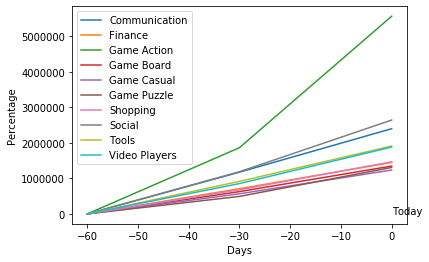

In [13]:
grouped = df_app.groupby("Category")["Ev_30_norm","Ev_60_norm"].mean()

for index in grouped[grouped["Ev_60_norm"] > 1200000].index:
    x = [-60,-30,0]
    y = [0,grouped.loc[index,"Ev_30_norm"],grouped.loc[index,"Ev_60_norm"]]
    plt.plot(x, y, label = index)
plt.annotate("Today",(0,0))
plt.xlabel('Days')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Ranking
**In this section we will try to made a simple but reliable score to make global ranking**

In [9]:
df_app.columns

Index(['URL', 'Rank', 'Name', 'Nb_Rating', 'Installs', 'Avg_Rating', 'Ev_30',
       'Ev_60', 'Price', 'Category', 'Parsable', 'histogram', 'size',
       'androidVersion', 'developer', 'developerId', 'containsAds', 'released',
       'updated', 'version', 'comments', 'icon', 'Ev_30_norm', 'Ev_60_norm',
       'Score', 'Global_rank'],
      dtype='object')

In [10]:
test = df_app[["URL","Name", "Nb_Rating", "Installs", "Avg_Rating","icon", "Category"]].copy()

In [11]:
from math import log10
test["log_Install"] = test["Installs"].apply(lambda x: log10(x))

In [12]:
test

,URL,Name,Nb_Rating,Installs,Avg_Rating,icon,Category,log_Install
0,/application/canva_graphic_design_video_invite...,"Canva: Graphic Design, Video, Invite & Logo Maker",2241579,50000000.0,4.68,https://lh3.googleusercontent.com/homswqZDKEXx...,Art & Design,7.69897
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,ibis Paint X,642389,10000000.0,4.45,https://lh3.googleusercontent.com/QcfhlXm32JDn...,Art & Design,7.00000
2,/application/kappboom_cool_wallpapers_backgrou...,Kappboom - Cool Wallpapers & Background Wallpa...,399327,10000000.0,4.63,https://lh3.googleusercontent.com/7aIuxwpjZ9_S...,Art & Design,7.00000
3,/application/flipaclip_cartoon_animation/com.v...,FlipaClip: Cartoon animation,319841,10000000.0,4.28,https://lh3.googleusercontent.com/v1LHbiVKdHFs...,Art & Design,7.00000
4,/application/u_launcher_lite_new_3d_launcher_2...,"U Launcher Lite-New 3D Launcher 2019, Hide apps",216161,10000000.0,4.52,https://lh3.googleusercontent.com/1-d8bEwvbj4c...,Art & Design,7.00000
5,/application/medibang_paint_make_art_/com.medi...,MediBang Paint - Make Art !,194262,10000000.0,4.10,https://lh3.googleusercontent.com/gJiINYcgwxuy...,Art & Design,7.00000
6,/application/u_launcher_3d_new_launcher_2019_3...,"U Launcher 3D: New Launcher 2019, 3d themes",130195,5000000.0,4.50,https://lh3.googleusercontent.com/bgXCQ7c3ahr0...,Art & Design,6.69897
7,/application/papercolor/com.eyewind.paperone,PaperColor,111058,10000000.0,4.23,https://lh3.googleusercontent.com/zk1SVbWvnYrH...,Art & Design,7.00000
8,/application/sand_draw_sketch_drawing_pad_crea...,Sand Draw Sketch Drawing Pad: Creative Doodle Art,99055,5000000.0,4.37,https://lh3.googleusercontent.com/FEtDcu77tw3X...,Art & Design,6.69897
9,/application/how_to_draw_graffitis/com.sweefit...,How to Draw Graffitis,94175,5000000.0,4.33,https://lh3.googleusercontent.com/Ax5kgE7e8TLP...,Art & Design,6.69897


In [13]:
for alpha in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    test[str(alpha)] = (alpha*(test["log_Install"]-test["log_Install"].min())/(test["log_Install"].max()-test["log_Install"].min())+(1-alpha)*(test["Nb_Rating"]-test["Nb_Rating"].min())/(test["Nb_Rating"].max()-test["Nb_Rating"].min()))*df_app["Avg_Rating"]
    test[str(alpha)]=((test[str(alpha)]-test[str(alpha)].min())/(test[str(alpha)].max()-test[str(alpha)].min()))

In [14]:
test.sort_values([str(alpha)], ascending=False).head(20)

,URL,Name,Nb_Rating,Installs,Avg_Rating,icon,Category,log_Install,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
13564,/application/google/com.google.android.googleq...,Google,13997467,5.000000e+09,4.41,https://lh3.googleusercontent.com/DKoidc0T3T1K...,Tools,9.69897,0.134621,0.221548,0.311398,0.401186,0.490912,0.580576,0.670178,0.759719,0.849198,0.938616,1.000000
2945,/application/gmail/com.google.android.gm,Gmail,6743557,5.000000e+09,4.40,https://lh3.googleusercontent.com/qTG9HMCp-s_a...,Communication,9.69897,0.064709,0.158199,0.254847,0.351428,0.447943,0.544392,0.640774,0.737090,0.833340,0.929524,0.997732
11595,/application/google_drive/com.google.android.a...,Google Drive,5081538,5.000000e+09,4.39,https://lh3.googleusercontent.com/1pw-tHjrkmMg...,Productivity,9.69897,0.048649,0.143467,0.241497,0.339459,0.437354,0.535181,0.632941,0.730634,0.828260,0.925818,0.995465
2939,/application/google_chrome_fast_secure/com.and...,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,https://lh3.googleusercontent.com/KwUBNPbMTk9j...,Communication,9.69897,0.186588,0.267529,0.351216,0.434847,0.518419,0.601934,0.685392,0.768792,0.852134,0.935420,0.990930
13583,/application/android_accessibility_suite/com.g...,Android Accessibility Suite,1830589,5.000000e+09,4.36,https://lh3.googleusercontent.com/xBFTJQCPqUh0...,Tools,9.69897,0.017405,0.114558,0.215030,0.315432,0.415765,0.516030,0.616225,0.716351,0.816408,0.916397,0.988662
11114,/application/samsung_gallery/com.sec.android.g...,Samsung Gallery,2244874,1.000000e+09,4.69,https://lh3.googleusercontent.com/lK_46LxpdLsR...,Photography,9.00000,0.022960,0.119386,0.219112,0.318770,0.418359,0.517879,0.617331,0.716714,0.816029,0.915276,0.986850
13586,/application/google_text_to_speech/com.google....,Google Text-to-Speech,1661524,5.000000e+09,4.35,https://lh3.googleusercontent.com/NqWvryDAnkEW...,Tools,9.69897,0.015761,0.112840,0.213244,0.313578,0.413843,0.514039,0.614166,0.714224,0.814213,0.914134,0.986395
14050,/application/maps_navigate_explore/com.google....,Maps - Navigate & Explore,11175295,5.000000e+09,4.33,https://lh3.googleusercontent.com/Kf8WTct65hFJ...,Travel & Local,9.69897,0.105528,0.193414,0.284320,0.375164,0.465946,0.556665,0.647321,0.737915,0.828447,0.918917,0.981859
2936,/application/whatsapp_messenger/com.whatsapp,WhatsApp Messenger,106884902,5.000000e+09,4.29,https://lh3.googleusercontent.com/bYtqbOcTYOlg...,Communication,9.69897,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972789
11613,/application/samsung_email/com.samsung.android...,Samsung Email,1199509,1.000000e+09,4.62,https://lh3.googleusercontent.com/MaRCSacmqLlb...,Productivity,9.00000,0.012085,0.108049,0.207352,0.306585,0.405751,0.504848,0.603877,0.702838,0.801731,0.900556,0.972121


In [39]:
test.to_csv("data/facebook_barplot.csv", index=False)

In [16]:
test["Global_rank"] = test["0.5"].rank(ascending = False)

In [19]:
test_500 = test.sort_values(["Global_rank"])[:500].copy()

In [25]:
category = test_500.Category.unique()[0]

In [ ]:
list(filter(lambda person: person['category'] == 'Communication', bigjson))

In [50]:
list(filter(lambda prout: prout["name"] == 'Communication', data["children"]))[0]["children"] = 1

In [58]:
test_500.loc[test_500["URL"]==url, "Name"].values[0]

'Dream Piano - Music Game'

In [63]:
data

{'name': 'Top500',
 'shortName': 'Top500',
 'children': [{'name': 'Communication',
   'shortName': 'Communication',
   'children': [{'name': 'WhatsApp Messenger',
     'shortName': 'WhatsApp Messenger',
     'size': 1.0},
    {'name': 'Messenger – Text and Video Chat for Free',
     'shortName': 'Messenger – Text and Video Chat for Free',
     'size': 0.7873154670000363},
    {'name': 'Google Chrome: Fast & Secure',
     'shortName': 'Google Chrome: Fast & Secure',
     'size': 0.6019340391007627},
    {'name': 'Gmail', 'shortName': 'Gmail', 'size': 0.544392063104758},
    {'name': 'UC Browser- Free & Fast Video Downloader, News App',
     'shortName': 'UC Browser- Free & Fast Video Downloader, News App',
     'size': 0.5420557723541972},
    {'name': 'Truecaller: Caller ID, block robocalls & spam SMS',
     'shortName': 'Truecaller: Caller ID, block robocalls & spam SMS',
     'size': 0.5340941390628422},
    {'name': 'Viber Messenger - Messages, Group Chats & Calls',
     'shortName'

In [65]:
import json

data = {}
data['name'] = "Top500"
data['shortName'] = "Top500"
data['children'] = []
for category in test_500.Category.unique():
    data['children'].append({
        'name': category,
        'shortName': category,
        'children': []
    })
    for url in test_500.loc[test_500["Category"]==category, "URL"]:
        list(filter(lambda prout: prout["name"] == category, data["children"]))[0]["children"].append({
            'name': emoji_pattern.sub(r'', test_500.loc[test_500["URL"]==url, "Name"].values[0]),
            'shortName': emoji_pattern.sub(r'', test_500.loc[test_500["URL"]==url, "Name"].values[0]),
            "size": test_500.loc[test_500["URL"]==url, "0.5"].values[0]
        })
with open('data/treemap.txt', 'w') as outfile:
    json.dump(data, outfile)

In [20]:
import json
test_500

,URL,Name,Nb_Rating,Installs,Avg_Rating,icon,Category,log_Install,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,Global_rank
2936,/application/whatsapp_messenger/com.whatsapp,WhatsApp Messenger,106884902,5.000000e+09,4.29,https://lh3.googleusercontent.com/bYtqbOcTYOlg...,Communication,9.69897,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972789,1.0
12586,/application/instagram/com.instagram.android,Instagram,95806924,1.000000e+09,4.46,https://lh3.googleusercontent.com/2sREY-8Upjma...,Social,9.00000,0.931876,0.934958,0.938272,0.941584,0.944894,0.948201,0.951507,0.954810,0.958110,0.961409,0.938454,2.0
12585,/application/facebook/com.facebook.katana,Facebook,96409662,5.000000e+09,4.24,https://lh3.googleusercontent.com/ccWDU4A7fX1R...,Social,9.69897,0.891482,0.900862,0.910609,0.920350,0.930083,0.939810,0.949531,0.959244,0.968951,0.978651,0.961451,3.0
2937,/application/messenger_text_and_video_chat_for...,Messenger – Text and Video Chat for Free,71185969,1.000000e+09,4.24,https://lh3.googleusercontent.com/rkBi-WHAI-dz...,Communication,9.00000,0.658243,0.683151,0.709219,0.735269,0.761301,0.787315,0.813312,0.839290,0.865251,0.891194,0.892163,4.0
14543,/application/youtube/com.google.android.youtube,YouTube,67255190,5.000000e+09,4.14,https://lh3.googleusercontent.com/lMoItBgdPPVD...,Video Players,9.69897,0.607229,0.641902,0.677905,0.713882,0.749835,0.785764,0.821667,0.857546,0.893400,0.929230,0.938776,5.0
21281,/application/clash_of_clans/com.supercell.clas...,Clash of Clans,51568217,5.000000e+08,4.51,https://lh3.googleusercontent.com/akv2Bdp7i5Vv...,Game Strategy,8.69897,0.507206,0.549381,0.593225,0.637039,0.680822,0.724575,0.768299,0.811992,0.855655,0.899288,0.917234,6.0
15511,/application/garena_free_fire_kalahari/com.dts...,Garena Free Fire: Kalahari,43395207,5.000000e+08,4.36,https://lh3.googleusercontent.com/LJxdq84-4j_f...,Game Action,8.69897,0.412624,0.460847,0.511061,0.561240,0.611385,0.661496,0.711572,0.761613,0.811620,0.861593,0.886727,7.0
16497,/application/subway_surfers/com.kiloo.subwaysurf,Subway Surfers,32200740,1.000000e+09,4.47,https://lh3.googleusercontent.com/qW2OiztjJl0V...,Game Arcade,9.00000,0.313905,0.377276,0.442967,0.508612,0.574213,0.639768,0.705278,0.770743,0.836163,0.901538,0.940559,8.0
13562,/application/google_play_services/com.google.a...,Google Play services,28257988,5.000000e+09,4.26,https://lh3.googleusercontent.com/f6ZSUJrtL5un...,Tools,9.69897,0.262528,0.333515,0.406994,0.480422,0.553800,0.627127,0.700404,0.773630,0.846806,0.919932,0.965986,9.0
17330,/application/candy_crush_saga/com.king.candycr...,Candy Crush Saga,27770636,5.000000e+08,4.63,https://lh3.googleusercontent.com/yFQN_JmP4ks7...,Game Casual,8.69897,0.280409,0.347147,0.416319,0.485442,0.554519,0.623547,0.692528,0.761462,0.830348,0.899187,0.941639,10.0


In [14]:
df_app["Score"] = (alpha*df_app["Installs"]+(1-alpha)df_app["Nb_Rating"])*df_app["Avg_Rating"]

In [15]:
df_app["Global_rank"] = df_app["Score"].rank(ascending = False)

In [5]:
df_app.sort_values(["Global_rank"]).head(20)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
13564,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,True,"Aug 12, 2010",1.587136e+09,Varies with device,[],https://lh3.googleusercontent.com/DKoidc0T3T1K...,29394680.7,54590121.3,2.211173e+10,1.0
2945,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,True,"Sep 21, 2010",1.587253e+09,Varies with device,[],https://lh3.googleusercontent.com/qTG9HMCp-s_a...,11464046.9,19556315.3,2.202967e+10,2.0
11595,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,False,"Apr 27, 2011",1.586790e+09,Varies with device,"[{'userName': 'Dan Haski', 'userImage': 'https...",https://lh3.googleusercontent.com/1pw-tHjrkmMg...,12703845.0,23883228.6,2.197231e+10,3.0
2939,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,False,"Feb 7, 2012",1.586974e+09,Varies with device,[],https://lh3.googleusercontent.com/KwUBNPbMTk9j...,56777383.2,109639084.8,2.193556e+10,4.0
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,False,"Oct 18, 2010",1.586970e+09,2.20.123,[],https://lh3.googleusercontent.com/bYtqbOcTYOlg...,192392823.6,363408666.8,2.190854e+10,5.0
13583,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,False,NaN,1.586882e+09,Varies with device,[],https://lh3.googleusercontent.com/xBFTJQCPqUh0...,4027295.8,6224002.6,2.180798e+10,6.0
13586,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,False,"Oct 10, 2013",1.587021e+09,Varies with device,[],https://lh3.googleusercontent.com/NqWvryDAnkEW...,3821505.2,5815334.0,2.175723e+10,7.0
14050,/application/maps_navigate_explore/com.google....,1.0,Maps - Navigate & Explore,11175295,5.000000e+09,4.33,1.1,1.9,Free,Travel & Local,...,True,NaN,1.586968e+09,Varies with device,[],https://lh3.googleusercontent.com/Kf8WTct65hFJ...,12292824.5,21233060.5,2.169839e+10,8.0
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,True,NaN,1.587188e+09,Varies with device,[],https://lh3.googleusercontent.com/ccWDU4A7fX1R...,86768695.8,183178357.8,2.160878e+10,9.0
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,False,"May 24, 2012",1.587309e+09,Varies with device,[],https://lh3.googleusercontent.com/f6ZSUJrtL5un...,45212780.8,98902958.0,2.142038e+10,10.0


**Thanks to an API on the same website we can also get more detailled information but it is limited to 100 requests per hour**

**These cells will be explored later to get more information for the best ranked app in the overall ranking**

In [16]:
def call_api(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    return response

In [17]:
#################### HERE we will need to define which app need more information
website = "https://www.androidrank.org/api/application/"
key = "60lnc52x178li1rocmpum3829kdf6d9wt3dp7lqg7vxmqat6ov9ekcoipmqyuzpa"

for url in df_app.sort_values(["Global_rank"])["URL"].head(500):
    codename = url.split('/')[-1]
    search = website+codename+"?key="+key;
    response = call_api(search)
    bigjson.append(response.json())

NameError: name 'bigjson' is not defined

In [19]:
len(bigjson)

500

In [ ]:
# Now we have more detailled informations about the top 500 apps
import json
with open('data/bigjson.txt', 'w') as outfile:
    json.dump(bigjson, outfile)

In [ ]:
################## Exemple on how to navigate in the big dictionnary
test = list(filter(lambda person: person['category'] == 'Communication', bigjson))

**Let's scrape the 500 most relevant comment for the 500 top apps**

In [40]:
from google_play_scraper import Sort, reviews
i = 483
tot_page = 500
for url in df_app.sort_values(["Global_rank"])["URL"].head(500)[i:]:
    continuation_token = None
    i += 1
    printed= i/tot_page*100
    stdout.write("\r%f %%" % printed)
    stdout.flush()
    codename = url.split('/')[-1]
    resultfinal = []
    for j in range(5):
        result, continuation_token = reviews(
            codename,
            lang='en', # defaults to 'en'
            country='us', # defaults to 'us'
            sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
            count=100, # defaults to 100
            continuation_token=continuation_token
        )
        resultfinal = resultfinal + result
    df_app.at[df_app.index[df_app["URL"]==url].tolist()[0],"comments"] = resultfinal

100.000000 %

In [41]:
df_app.sort_values(["Global_rank"]).head(500)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
13564,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,True,"Aug 12, 2010",1.587136e+09,Varies with device,"[{'userName': 'Noor Zaman', 'userImage': 'http...",https://lh3.googleusercontent.com/DKoidc0T3T1K...,29394680.7,54590121.3,2.211173e+10,1.0
2945,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,True,"Sep 21, 2010",1.587253e+09,Varies with device,"[{'userName': 'Dustin Smith', 'userImage': 'ht...",https://lh3.googleusercontent.com/qTG9HMCp-s_a...,11464046.9,19556315.3,2.202967e+10,2.0
11595,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,False,"Apr 27, 2011",1.586790e+09,Varies with device,"[{'userName': 'Andre Allen', 'userImage': 'htt...",https://lh3.googleusercontent.com/1pw-tHjrkmMg...,12703845.0,23883228.6,2.197231e+10,3.0
2939,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,False,"Feb 7, 2012",1.586974e+09,Varies with device,"[{'userName': 'Diana Wilhelm', 'userImage': 'h...",https://lh3.googleusercontent.com/KwUBNPbMTk9j...,56777383.2,109639084.8,2.193556e+10,4.0
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,False,"Oct 18, 2010",1.586970e+09,2.20.123,"[{'userName': 'Nagham Jouni', 'userImage': 'ht...",https://lh3.googleusercontent.com/bYtqbOcTYOlg...,192392823.6,363408666.8,2.190854e+10,5.0
13583,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,False,NaN,1.586882e+09,Varies with device,"[{'userName': 'Imran Hilmy', 'userImage': 'htt...",https://lh3.googleusercontent.com/xBFTJQCPqUh0...,4027295.8,6224002.6,2.180798e+10,6.0
13586,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,False,"Oct 10, 2013",1.587021e+09,Varies with device,"[{'userName': 'yatin panchal', 'userImage': 'h...",https://lh3.googleusercontent.com/NqWvryDAnkEW...,3821505.2,5815334.0,2.175723e+10,7.0
14050,/application/maps_navigate_explore/com.google....,1.0,Maps - Navigate & Explore,11175295,5.000000e+09,4.33,1.1,1.9,Free,Travel & Local,...,True,NaN,1.586968e+09,Varies with device,"[{'userName': 'Michael Ford', 'userImage': 'ht...",https://lh3.googleusercontent.com/Kf8WTct65hFJ...,12292824.5,21233060.5,2.169839e+10,8.0
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,True,NaN,1.587188e+09,Varies with device,"[{'userName': 'Kathleen Berning', 'userImage':...",https://lh3.googleusercontent.com/ccWDU4A7fX1R...,86768695.8,183178357.8,2.160878e+10,9.0
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,False,"May 24, 2012",1.587309e+09,Varies with device,"[{'userName': 'Sharky's Machine', 'userImage':...",https://lh3.googleusercontent.com/f6ZSUJrtL5un...,45212780.8,98902958.0,2.142038e+10,10.0


In [42]:
df_app.to_csv("data/final_dataset.csv")

In [43]:
df_app.columns

Index(['URL', 'Rank', 'Name', 'Nb_Rating', 'Installs', 'Avg_Rating', 'Ev_30',
       'Ev_60', 'Price', 'Category', 'Parsable', 'histogram', 'size',
       'androidVersion', 'developer', 'developerId', 'containsAds', 'released',
       'updated', 'version', 'comments', 'icon', 'Ev_30_norm', 'Ev_60_norm',
       'Score', 'Global_rank'],
      dtype='object')

**DEVELOPERS**

In [50]:
df_app.groupby("developer")["Name"].count().sort_values(ascending=False)

developer
Google LLC                                        98
BabyBus                                           81
Weather Widget Theme Dev Team                     58
VOODOO                                            44
Gameloft SE                                       43
Libii                                             43
Coco Play By TabTale                              39
mobirix                                           34
ELECTRONIC ARTS                                   34
Samsung Electronics Co.,  Ltd.                    32
Ketchapp                                          32
Tapps Games                                       31
Microsoft Corporation                             31
IGG.COM                                           29
Yandex Apps                                       28
Leap Fitness Group                                26
InShot Inc.                                       26
Motorola Mobility LLC.                            25
Lion Studios                        

In [58]:
df_app[df_app["developer"]=="TikTok Pte. Ltd."]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
14547,/application/tiktok/com.ss.android.ugc.trill,5.0,TikTok,5194981,100000000.0,4.49,4.4,8.2,Free,Video Players,...,False,"May 7, 2017",1.587215e+09,15.7.30,"[{'userName': 'thetimidgirl', 'userImage': 'ht...",https://lh3.googleusercontent.com/2kdv4gGWKchM...,22857916.4,42598844.2,4.723255e+08,170.0


In [59]:
df_app[df_app["developer"]=="TikTok Inc."]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
12588,/application/tiktok_make_your_day/com.zhiliaoa...,4.0,TikTok - Make Your Day,17286758,500000000.0,4.55,6.6,12.9,Free,Social,...,True,"Jul 9, 2015",1.587212e+09,15.7.5,"[{'userName': 'Gerrit Groenewald', 'userImage'...",https://lh3.googleusercontent.com/z5nin1RdQ4UZ...,114092602.8,222999178.2,2.353655e+09,54.0


In [56]:
df_app.groupby("developer")["Nb_Rating"].mean().sort_values(ascending=False).head(50)

developer
WhatsApp Inc.                             3.726692e+07
Instagram                                 2.448745e+07
GARENA INTERNATIONAL I PRIVATE LIMITED    2.178652e+07
Snap Inc                                  2.145865e+07
Supercell                                 1.777575e+07
TikTok Inc.                               1.728676e+07
Facebook                                  1.692612e+07
Safe Security Develop                     1.682958e+07
SYBO Games                                1.620498e+07
Viber Media S.à r.l.                      1.357553e+07
SHAREit Technologies Co.Ltd               1.341056e+07
BBM .                                     1.298689e+07
True Software Scandinavia AB              1.218324e+07
Roblox Corporation                        1.193458e+07
Zakeh                                     1.104251e+07
Skype                                     1.096306e+07
Duolingo                                  8.796081e+06
Moonton                                   8.786584e+06


In [61]:
df_app.groupby("developer")["Installs"].mean().sort_values(ascending=False).head(50)

developer
WhatsApp Inc.                             1.733333e+09
SHAREit Technologies Co.Ltd               1.000000e+09
Skype                                     1.000000e+09
Snap Inc                                  1.000000e+09
Google LLC                                7.194388e+08
Facebook                                  6.937273e+08
ANT+                                      6.668333e+08
SYBO Games                                5.025000e+08
Flipboard                                 5.000000e+08
True Software Scandinavia AB              5.000000e+08
Zakeh                                     5.000000e+08
Dropbox, Inc.                             5.000000e+08
Viber Media S.à r.l.                      5.000000e+08
TikTok Inc.                               5.000000e+08
Samsung Electronics Co.,  Ltd.            4.189688e+08
HP Inc.                                   3.050000e+08
Instagram                                 3.002500e+08
Fingersoft                                3.000000e+08


In [62]:
df_app.groupby("developer")["Score"].mean().sort_values(ascending=False).head(50)

developer
WhatsApp Inc.                             7.590385e+09
Snap Inc                                  4.453560e+09
SHAREit Technologies Co.Ltd               4.367800e+09
Skype                                     4.347141e+09
Google LLC                                3.109619e+09
Facebook                                  3.011601e+09
ANT+                                      2.671266e+09
TikTok Inc.                               2.353655e+09
True Software Scandinavia AB              2.325312e+09
SYBO Games                                2.318846e+09
Viber Media S.à r.l.                      2.234054e+09
Zakeh                                     2.233256e+09
Dropbox, Inc.                             2.133475e+09
Flipboard                                 2.091381e+09
Samsung Electronics Co.,  Ltd.            1.838242e+09
Instagram                                 1.449971e+09
Fingersoft                                1.356322e+09
HP Inc.                                   1.321928e+09


## ADS

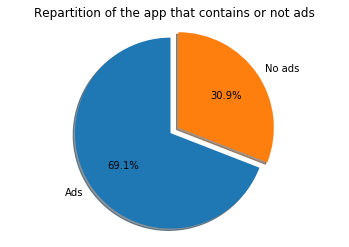

In [63]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[df_app["containsAds"]==True])[0], np.shape(df_app[df_app["containsAds"]==False])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads")
plt.show()

In [11]:
import json

data = {}
data['name'] = "Root"
data['children'] = []
for category in df_app.Category.unique():
    data['children'].append({
        'name': category,
        "size": np.shape(df_app[(df_app["Price"]!="Free") & (df_app["Category"]==category)])[0]/np.shape(df_app[(df_app["Category"]==category)])[0]
    })
with open('data/bubblePaid.txt', 'w') as outfile:
    json.dump(data, outfile)

In [37]:
df_app["Category"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Art & Design
1        Art & Design
2        Art & Design
3        Art & Design
4        Art & Design
5        Art & Design
6        Art & Design
7        Art & Design
8        Art & Design
9        Art & Design
10       Art & Design
11       Art & Design
12       Art & Design
13       Art & Design
14       Art & Design
15       Art & Design
16       Art & Design
17       Art & Design
18       Art & Design
19       Art & Design
20       Art & Design
21       Art & Design
22       Art & Design
23       Art & Design
24       Art & Design
25       Art & Design
26       Art & Design
27       Art & Design
28       Art & Design
29       Art & Design
             ...     
22717       Game Word
22718       Game Word
22719       Game Word
22720       Game Word
22721       Game Word
22722       Game Word
22723       Game Word
22724       Game Word
22725       Game Word
22726       Game Word
22727       Game Word
22728       Game Word
22729     

In [33]:
import json

data = {}
data['name'] = "Root"
data['children'] = []
data['children'].append({
    'name': "Paid",
    "size": np.shape(df_app[(df_app["Price"]!="Free")])[0],
    'children': []
})
for category in df_app.Category.unique():
    list(filter(lambda prout: prout["name"] == "Paid", data["children"]))[0]["children"].append({
        'name': category,
        "size": np.shape(df_app[((df_app["Category"] == category) & (df_app["Price"]!="Free"))])[0]
    })
data['children'].append({
    'name': "Free",
    "size": np.shape(df_app[(df_app["Price"]=="Free")])[0],
    "children":[]
})
for category in df_app.Category.unique():
    list(filter(lambda prout: prout["name"] == "Free", data["children"]))[0]["children"].append({
        'name': category,
        "size": np.shape(df_app[((df_app["Category"] == category) & (df_app["Price"]=="Free"))])[0]
    })
with open('data/bubbleAdsperPaid.txt', 'w') as outfile:
    json.dump(data, outfile)


In [34]:
data

{'name': 'Root',
 'children': [{'name': 'Paid',
   'size': 119,
   'children': [{'name': 'Art & Design', 'size': 2},
    {'name': 'Auto & Vehicles', 'size': 1},
    {'name': 'Beauty', 'size': 0},
    {'name': 'Books & Reference', 'size': 2},
    {'name': 'Business', 'size': 4},
    {'name': 'Comics', 'size': 1},
    {'name': 'Communication', 'size': 3},
    {'name': 'Dating', 'size': 1},
    {'name': 'Education', 'size': 0},
    {'name': 'Entertainment', 'size': 0},
    {'name': 'Events', 'size': 1},
    {'name': 'Finance', 'size': 0},
    {'name': 'Food & Drink', 'size': 0},
    {'name': 'Health & Fitness', 'size': 0},
    {'name': 'House & Home', 'size': 0},
    {'name': 'Libraries & Demo', 'size': 8},
    {'name': 'Lifestyle', 'size': 1},
    {'name': 'Maps & Navigation', 'size': 2},
    {'name': 'Medical', 'size': 3},
    {'name': 'Music & Audio', 'size': 4},
    {'name': 'News & Magazines', 'size': 3},
    {'name': 'Parenting', 'size': 7},
    {'name': 'Personalization', 'size': 2

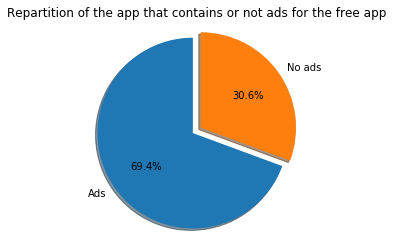

In [64]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Price"]=="Free")])[0], np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Price"]=="Free")])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the free app")
plt.show()

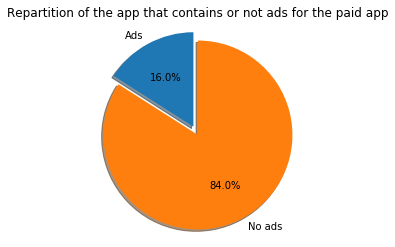

In [65]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Price"]!="Free")])[0], np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Price"]!="Free")])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the paid app")
plt.show()

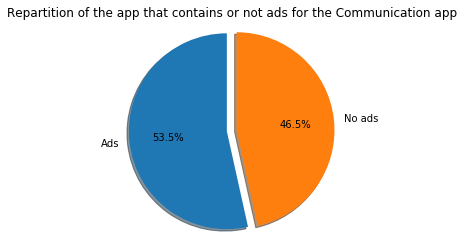

In [71]:
### PER Category
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app
category = "Communication"

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Category"]==category)])[0], 
        np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Category"]==category)])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the " + category +" app")
plt.show()

In [4]:
df_containsAds = pd.DataFrame(columns=["Category","Ads_or_not", "Count"],index=df_app.Category.unique())
df_containsAds

,Category,Ads_or_not,Count
Art & Design,NaN,NaN,NaN
Auto & Vehicles,NaN,NaN,NaN
Beauty,NaN,NaN,NaN
Books & Reference,NaN,NaN,NaN
Business,NaN,NaN,NaN
Comics,NaN,NaN,NaN
Communication,NaN,NaN,NaN
Dating,NaN,NaN,NaN
Education,NaN,NaN,NaN
Entertainment,NaN,NaN,NaN


In [5]:
df_containsAds = pd.DataFrame(columns=["Category","Ads_or_not", "Count"])
for category in df_app.Category.unique():
    df_containsAds = df_containsAds.append({"Category": category, "Ads_or_not": "Ads", "Count": np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Category"]==category)])[0]}, ignore_index=True)
    df_containsAds = df_containsAds.append({"Category": category, "Ads_or_not": "No_Ads", "Count": np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Category"]==category)])[0]}, ignore_index=True)
    

In [6]:
df_containsAds

,Category,Ads_or_not,Count
0,Art & Design,Ads,439
1,Art & Design,No_Ads,49
2,Auto & Vehicles,Ads,346
3,Auto & Vehicles,No_Ads,151
4,Beauty,Ads,393
5,Beauty,No_Ads,86
6,Books & Reference,Ads,348
7,Books & Reference,No_Ads,145
8,Business,Ads,143
9,Business,No_Ads,353


In [7]:
df_containsAds.to_csv("containsAds.tsv", index=False)

In [24]:
df_containsAds.reset_index(name='new_name')

TypeError: reset_index() got an unexpected keyword argument 'name'

**We still have 16% of paid app that have ads**

In [100]:
df_app.loc[df_app["URL"]=="/application/telcel/com.telcel.contenedor"]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
4798,/application/telcel/com.telcel.contenedor,402.0,Telcel,33956,100000000.0,3.37,2.1,3.4,Free,Entertainment,...,True,NaN,1.586409e+09,13.2.0,[],https://lh3.googleusercontent.com/wMO-rS1oRRz6...,71307.6,115450.4,3.371144e+08,479.0


In [72]:
df_app_500 = df_app.sort_values(["Global_rank"]).head(500).copy()
df_app_500.reset_index(inplace=True, drop = True)

In [73]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [81]:
len(df_app_500.loc[0]['comments'])

500

In [85]:
df_app_500.loc[0]['comments'][0]['userName']

'Noor Zaman'

In [92]:
df_app_500.loc[index]['comments'][comment]

{'userName': 'Noor Zaman',
 'userImage': 'https://lh3.googleusercontent.com/-d_OTl4eXKMs/AAAAAAAAAAI/AAAAAAAAAAA/AAKWJJPSR8OiIl98VqJnFiweux9aVynavg/photo.jpg',
 'content': 'Hey Google! I want to tell you that there is a bug that needs to be fixed as soon as possible. It is the Weather Forecast via AccuWeather - whenever I ask Google Assist about "How\'s the weather going?" it says 95 degrees outside. It\'s unbelievable and ridiculous! I mean, who could possibly survive in that kind of heat?! It\'s been ongoing bug concern. Please fix.',
 'score': 5,
 'thumbsUpCount': 676,
 'reviewCreatedVersion': '11.6.8.21.arm',
 'at': datetime.datetime(2020, 4, 26, 8, 19, 17),
 'replyContent': None,
 'repliedAt': None}

In [141]:
for index in df_app_500[483:].index:
    comment_cleaned=""
    for comment in range(0, len(df_app_500.loc[index]['comments'])):
        if df_app_500.loc[index]['comments'][comment]['content']:
            comment_cleaned = comment_cleaned + remove_punct(stopword_remover(lowercase_all(df_app_500.loc[index]['comments'][comment]['content'])))
    df_app_500.at[index,"Comment_tot_cleaned"] = comment_cleaned.split()

In [143]:
df_app_500.to_csv("data/df_app_500.csv")

In [120]:
df_app_500.loc[index]['comments'][comment]

{'userName': 'A Google user',
 'userImage': 'https://lh3.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
 'content': None,
 'score': 5,
 'thumbsUpCount': 1,
 'reviewCreatedVersion': '3.1.8',
 'at': datetime.datetime(2015, 6, 26, 21, 46, 40),
 'replyContent': None,
 'repliedAt': None}

In [121]:
index

336

In [112]:
type(df_app_500.loc[0, "Comment_tot_cleaned"])

list

In [146]:
from collections import Counter
c = Counter(df_app_500.loc[3, "Comment_tot_cleaned"])
c.most_common(20)

[('chrome', 359),
 ('app', 268),
 ('update', 260),
 ('browser', 199),
 ('google', 196),
 ('phone', 130),
 ('please', 129),
 ('screen', 128),
 ('its', 127),
 ('use', 116),
 ('fix', 114),
 ('problem', 104),
 ('open', 101),
 ('even', 98),
 ('page', 95),
 ('time', 93),
 ('im', 92),
 ('like', 90),
 ('working', 89),
 ('cant', 86)]

In [148]:
df_app_500.loc[index]['comments'][comment]['replyContent']

In [159]:
for index in df_app_500[483:].index:
    nb_reply=0
    for comment in range(0, len(df_app_500.loc[index]['comments'])):
        if df_app_500.loc[index]['comments'][comment]['replyContent']:
            nb_reply +=1
    df_app_500.loc[index,"Comment_reply"] = nb_reply

In [160]:
index

499

In [161]:
df_app_500["Ci".sort_values(ascending=False)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank,Comment_tot_cleaned,Comment_reply
0,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,1.587136e+09,Varies with device,"[{'userName': 'Noor Zaman', 'userImage': 'http...",https://lh3.googleusercontent.com/DKoidc0T3T1K...,29394680.7,54590121.3,2.211173e+10,1.0,"[hey, google, want, tell, bug, needs, fixed, s...",191.0
1,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,1.587253e+09,Varies with device,"[{'userName': 'Dustin Smith', 'userImage': 'ht...",https://lh3.googleusercontent.com/qTG9HMCp-s_a...,11464046.9,19556315.3,2.202967e+10,2.0,"[yet, reliably, notified, email, whatsoever, i...",5.0
2,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,1.586790e+09,Varies with device,"[{'userName': 'Andre Allen', 'userImage': 'htt...",https://lh3.googleusercontent.com/1pw-tHjrkmMg...,12703845.0,23883228.6,2.197231e+10,3.0,"[couldnt, give, higher, rating, app, many, imp...",283.0
3,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,1.586974e+09,Varies with device,"[{'userName': 'Diana Wilhelm', 'userImage': 'h...",https://lh3.googleusercontent.com/KwUBNPbMTk9j...,56777383.2,109639084.8,2.193556e+10,4.0,"[chrome, pain, copying, pasting, want, select,...",89.0
4,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,1.586970e+09,2.20.123,"[{'userName': 'Nagham Jouni', 'userImage': 'ht...",https://lh3.googleusercontent.com/bYtqbOcTYOlg...,192392823.6,363408666.8,2.190854e+10,5.0,"[love, application, its, easy, use, need, upda...",0.0
5,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,1.586882e+09,Varies with device,"[{'userName': 'Imran Hilmy', 'userImage': 'htt...",https://lh3.googleusercontent.com/xBFTJQCPqUh0...,4027295.8,6224002.6,2.180798e+10,6.0,"[quite, buggy, right, now, always, use, select...",0.0
6,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,1.587021e+09,Varies with device,"[{'userName': 'yatin panchal', 'userImage': 'h...",https://lh3.googleusercontent.com/NqWvryDAnkEW...,3821505.2,5815334.0,2.175723e+10,7.0,"[speak, honest, performance, speed, response, ...",0.0
7,/application/maps_navigate_explore/com.google....,1.0,Maps - Navigate & Explore,11175295,5.000000e+09,4.33,1.1,1.9,Free,Travel & Local,...,1.586968e+09,Varies with device,"[{'userName': 'Michael Ford', 'userImage': 'ht...",https://lh3.googleusercontent.com/Kf8WTct65hFJ...,12292824.5,21233060.5,2.169839e+10,8.0,"[property, values, used, least, twice, day, wo...",348.0
8,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,1.587188e+09,Varies with device,"[{'userName': 'Kathleen Berning', 'userImage':...",https://lh3.googleusercontent.com/ccWDU4A7fX1R...,86768695.8,183178357.8,2.160878e+10,9.0,"[good, app, seems, like, updates, improvements...",0.0
9,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,1.587309e+09,Varies with device,"[{'userName': 'Sharky's Machine', 'userImage':...",https://lh3.googleusercontent.com/f6ZSUJrtL5un...,45212780.8,98902958.0,2.142038e+10,10.0,"[typically, dont, issues, google, sudden, pop,...",0.0


In [116]:
# Clean the comments
df_app_500['comments clean'] = df_app_500['comments'].apply(remove_punct).apply(stopword_remover).apply(lowercase_all)

TypeError: 'in <string>' requires string as left operand, not dict

In [13]:
df_app_500

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank,comments clean
0,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,"Aug 12, 2010",1.587136e+09,Varies with device,[],https://lh3.googleusercontent.com/DKoidc0T3T1K...,29394680.7,54590121.3,2.211173e+10,1.0,
1,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,"Sep 21, 2010",1.587253e+09,Varies with device,[],https://lh3.googleusercontent.com/qTG9HMCp-s_a...,11464046.9,19556315.3,2.202967e+10,2.0,
2,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,"Apr 27, 2011",1.586790e+09,Varies with device,"[{'userName': 'Dan Haski', 'userImage': 'https...",https://lh3.googleusercontent.com/1pw-tHjrkmMg...,12703845.0,23883228.6,2.197231e+10,3.0,username dan haski userimage httpslh3googleuse...
3,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,"Feb 7, 2012",1.586974e+09,Varies with device,[],https://lh3.googleusercontent.com/KwUBNPbMTk9j...,56777383.2,109639084.8,2.193556e+10,4.0,
4,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,"Oct 18, 2010",1.586970e+09,2.20.123,[],https://lh3.googleusercontent.com/bYtqbOcTYOlg...,192392823.6,363408666.8,2.190854e+10,5.0,
5,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,NaN,1.586882e+09,Varies with device,[],https://lh3.googleusercontent.com/xBFTJQCPqUh0...,4027295.8,6224002.6,2.180798e+10,6.0,
6,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,"Oct 10, 2013",1.587021e+09,Varies with device,[],https://lh3.googleusercontent.com/NqWvryDAnkEW...,3821505.2,5815334.0,2.175723e+10,7.0,
7,/application/maps_navigate_explore/com.google....,1.0,Maps - Navigate & Explore,11175295,5.000000e+09,4.33,1.1,1.9,Free,Travel & Local,...,NaN,1.586968e+09,Varies with device,[],https://lh3.googleusercontent.com/Kf8WTct65hFJ...,12292824.5,21233060.5,2.169839e+10,8.0,
8,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,NaN,1.587188e+09,Varies with device,[],https://lh3.googleusercontent.com/ccWDU4A7fX1R...,86768695.8,183178357.8,2.160878e+10,9.0,
9,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,"May 24, 2012",1.587309e+09,Varies with device,[],https://lh3.googleusercontent.com/f6ZSUJrtL5un...,45212780.8,98902958.0,2.142038e+10,10.0,


In [125]:
df_app_500["developer"].value_counts()

Google LLC                                  57
Samsung Electronics Co.,  Ltd.              23
Outfit7 Limited                             14
Motorola Mobility LLC.                      10
Microsoft Corporation                        8
ELECTRONIC ARTS                              7
King                                         7
Huawei Internet Services                     6
Xiaomi Inc.                                  5
Miniclip.com                                 5
Best Free Video Editor & Video Maker Dev     5
Sony Mobile Communications                   5
Rovio Entertainment Corporation              5
Amazon Mobile LLC                            5
Supercell                                    5
Facebook                                     5
VOODOO                                       4
Gameloft SE                                  4
Instagram                                    3
Good Job Games                               3
Airtel                                       3
Samsung R&D I

In [4]:
df_app_500 = pd.read_csv('data/df_app_500.csv', index_col=[0])
df_app_500.head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank,Comment_tot_cleaned,Comment_reply
0,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,1.587136e+09,Varies with device,"[{'userName': 'Noor Zaman', 'userImage': 'http...",https://lh3.googleusercontent.com/DKoidc0T3T1K...,29394680.7,54590121.3,2.211173e+10,1.0,"['hey', 'google', 'want', 'tell', 'bug', 'need...",191.0
1,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,1.587253e+09,Varies with device,"[{'userName': 'Dustin Smith', 'userImage': 'ht...",https://lh3.googleusercontent.com/qTG9HMCp-s_a...,11464046.9,19556315.3,2.202967e+10,2.0,"['yet', 'reliably', 'notified', 'email', 'what...",5.0
2,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,1.586790e+09,Varies with device,"[{'userName': 'Andre Allen', 'userImage': 'htt...",https://lh3.googleusercontent.com/1pw-tHjrkmMg...,12703845.0,23883228.6,2.197231e+10,3.0,"['couldnt', 'give', 'higher', 'rating', 'app',...",283.0
3,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,1.586974e+09,Varies with device,"[{'userName': 'Diana Wilhelm', 'userImage': 'h...",https://lh3.googleusercontent.com/KwUBNPbMTk9j...,56777383.2,109639084.8,2.193556e+10,4.0,"['chrome', 'pain', 'copying', 'pasting', 'want...",89.0
4,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,1.586970e+09,2.20.123,"[{'userName': 'Nagham Jouni', 'userImage': 'ht...",https://lh3.googleusercontent.com/bYtqbOcTYOlg...,192392823.6,363408666.8,2.190854e+10,5.0,"['love', 'application', 'its', 'easy', 'use', ...",0.0
5,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,1.586882e+09,Varies with device,"[{'userName': 'Imran Hilmy', 'userImage': 'htt...",https://lh3.googleusercontent.com/xBFTJQCPqUh0...,4027295.8,6224002.6,2.180798e+10,6.0,"['quite', 'buggy', 'right', 'now', 'always', '...",0.0
6,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,1.587021e+09,Varies with device,"[{'userName': 'yatin panchal', 'userImage': 'h...",https://lh3.googleusercontent.com/NqWvryDAnkEW...,3821505.2,5815334.0,2.175723e+10,7.0,"['speak', 'honest', 'performance', 'speed', 'r...",0.0
7,/application/maps_navigate_explore/com.google....,1.0,Maps - Navigate & Explore,11175295,5.000000e+09,4.33,1.1,1.9,Free,Travel & Local,...,1.586968e+09,Varies with device,"[{'userName': 'Michael Ford', 'userImage': 'ht...",https://lh3.googleusercontent.com/Kf8WTct65hFJ...,12292824.5,21233060.5,2.169839e+10,8.0,"['property', 'values', 'used', 'least', 'twice...",348.0
8,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,1.587188e+09,Varies with device,"[{'userName': 'Kathleen Berning', 'userImage':...",https://lh3.googleusercontent.com/ccWDU4A7fX1R...,86768695.8,183178357.8,2.160878e+10,9.0,"['good', 'app', 'seems', 'like', 'updates', 'i...",0.0
9,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,1.587309e+09,Varies with device,"[{'userName': ""Sharky's Machine"", 'userImage':...",https://lh3.googleusercontent.com/f6ZSUJrtL5un...,45212780.8,98902958.0,2.142038e+10,10.0,"['typically', 'dont', 'issues', 'google', 'sud...",0.0


In [71]:
df_app_500.groupby("developer")["Name"].count().sort_values(ascending=False)

developer
Google LLC                                          57
Samsung Electronics Co.,  Ltd.                      23
Outfit7 Limited                                     14
Motorola Mobility LLC.                              10
Microsoft Corporation                                8
King                                                 7
ELECTRONIC ARTS                                      7
Huawei Internet Services                             6
Xiaomi Inc.                                          5
Sony Mobile Communications                           5
Best Free Video Editor & Video Maker Dev             5
Supercell                                            5
Miniclip.com                                         5
Amazon Mobile LLC                                    5
Facebook                                             5
Rovio Entertainment Corporation                      5
Gameloft SE                                          4
VOODOO                                               4


In [9]:
df_app.Category.unique().size

48

In [14]:
res = [ ele for ele in df_app.Category.unique().tolist() ] 
for a in  df_app.Category.unique().tolist(): 
    if a in df_app_500.Category.unique().tolist(): 
        res.remove(a) 

In [15]:
res

['Beauty',
 'Comics',
 'Dating',
 'Events',
 'House & Home',
 'Libraries & Demo',
 'Medical',
 'Parenting',
 'Game Casino',
 'Game Role Playing',
 'Game Word']